# Notebook 11

In this notebook, we test basic predictive modelling approaches including only the country spatial encoding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

import pyproj as proj
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import data_processing_helper as dp
import practical_functions as pf
import geoplot as gplt
import warnings
from matplotlib import cm
warnings.filterwarnings("ignore")


###
# For categorical encoding
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
# Compute the distances between all surveys 
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,  cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import RepeatedKFold

from helper_model import *


import statsmodels.api as sm
from sklearn import tree

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

from statistics import mean, stdev




/home/lavinia/.local/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = pd.read_csv("../Data/Final_dataframe_30_05.csv")
df_untouched =df

In [3]:
# Keep only the country code
df.drop(columns = ["Local", "Regional", "State"], inplace = True)


In [4]:
y = df["pr_hard_coral"]
X = df.drop(columns = ["pr_hard_coral", "geometry", "country_code"])

In [5]:
# In order to have a gaussian distribution
y_sqrt = np.sqrt(y)

<AxesSubplot:title={'center':'Missing values data '}>

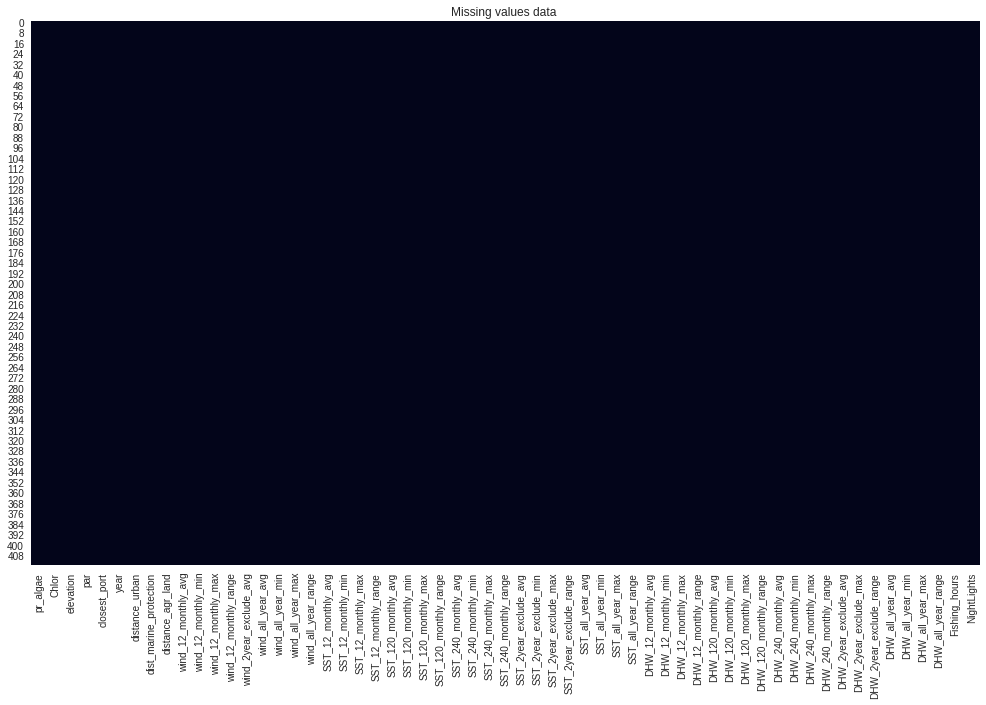

In [6]:
plt.figure(figsize = (17,10))
plt.title("Missing values data ")
sns.heatmap(X.isnull(), cbar=False)


In [7]:
# One hot encding for country code 


Pre-processing: This is not necessar< because I used a standard scalar

- sqrt for target variable, for distance urban ,dist_marine_protection, DHW120 monthy,DHW12 monthy,DHW_240_monthly_avg, Fishing Hours, Nighlights
- No change to closest port, PAR, elevation (debatable)
- log transform for distance_agr_land
- 

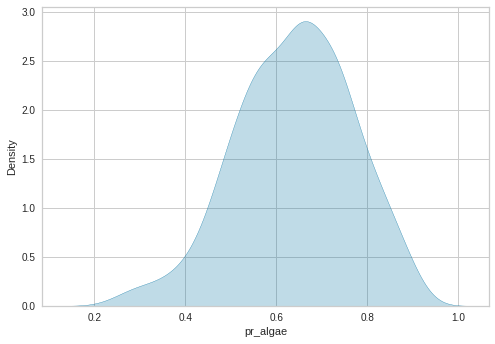

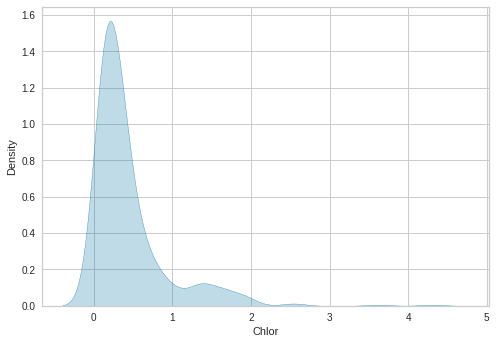

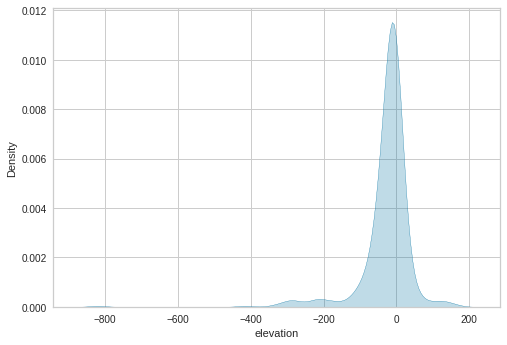

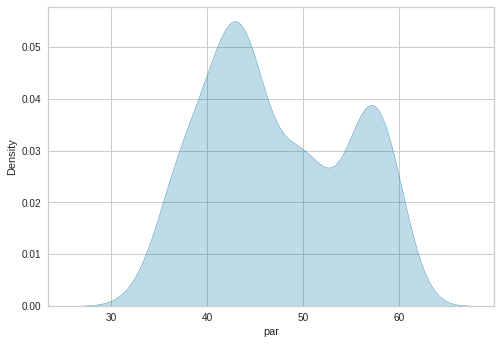

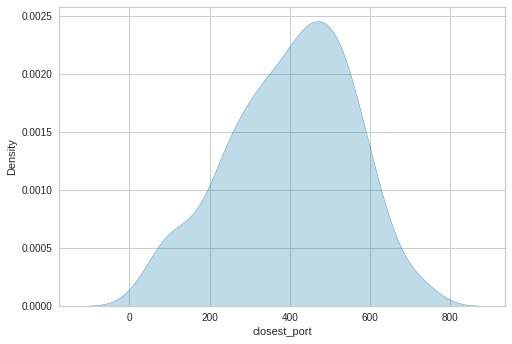

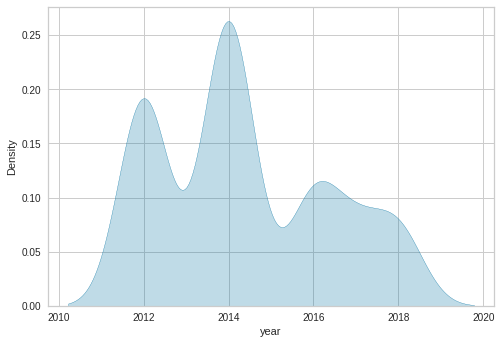

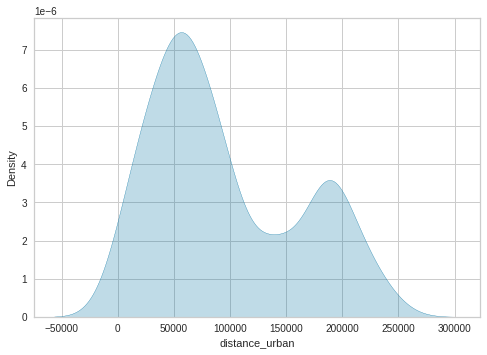

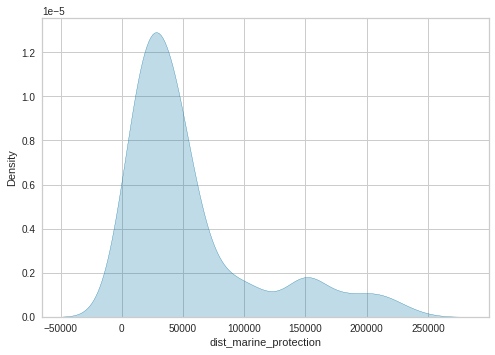

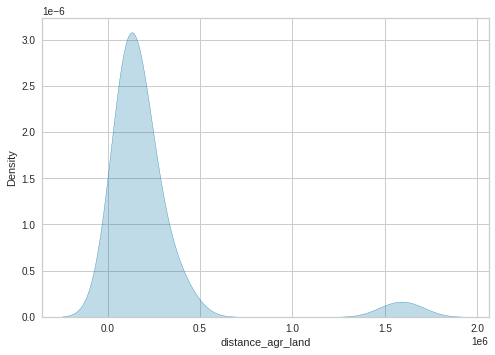

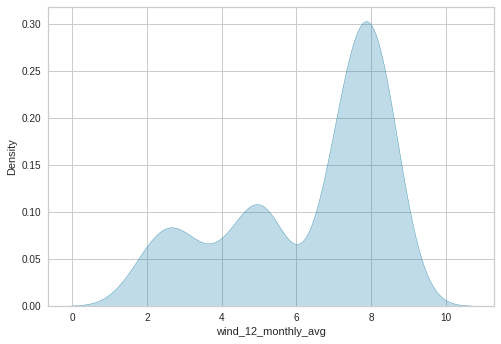

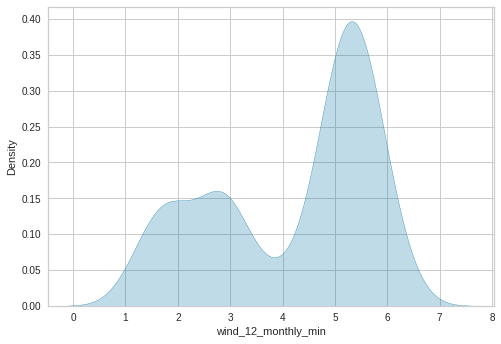

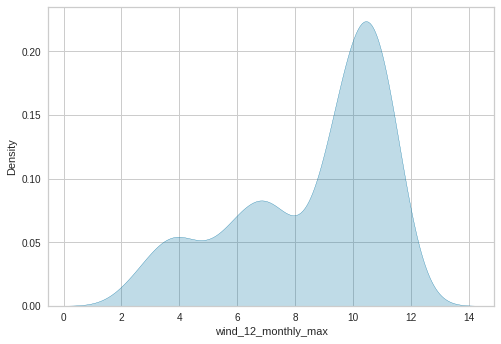

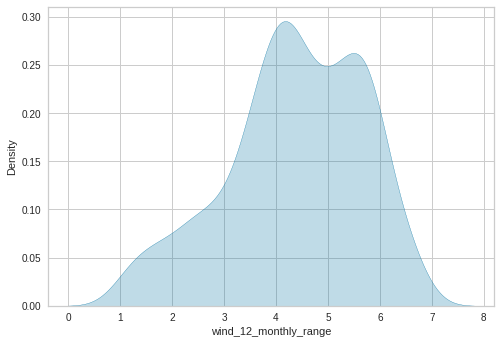

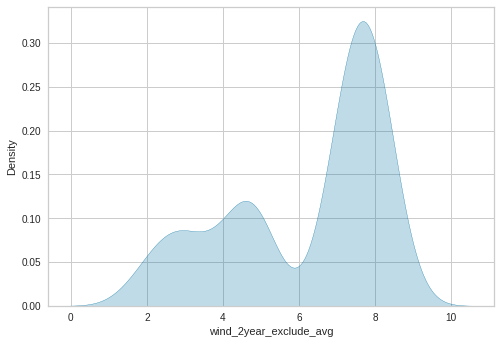

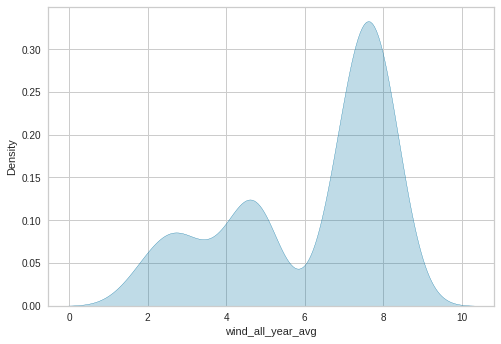

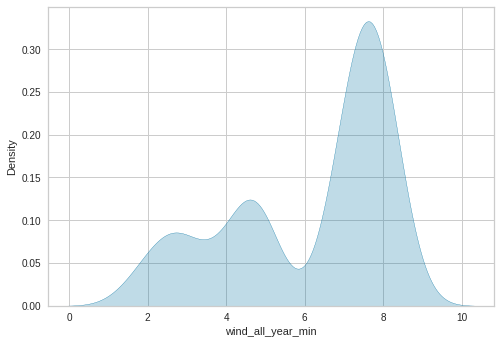

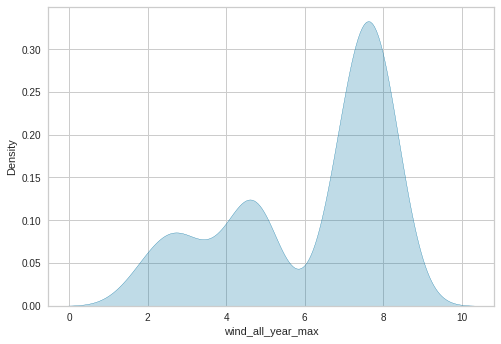

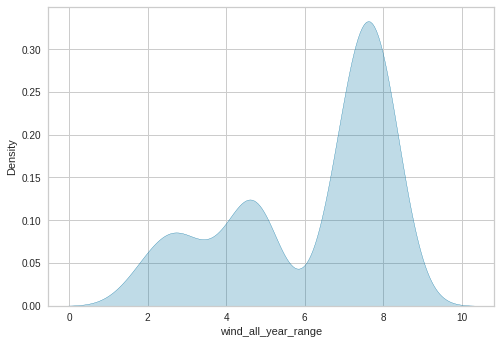

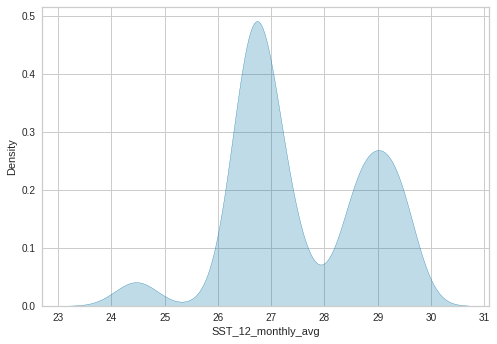

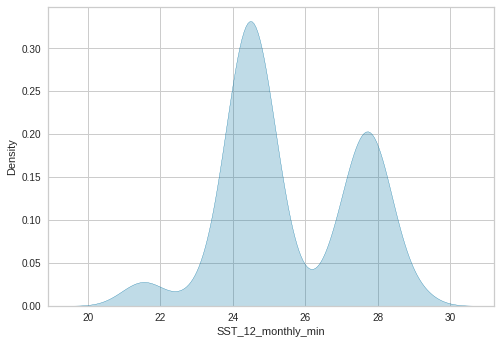

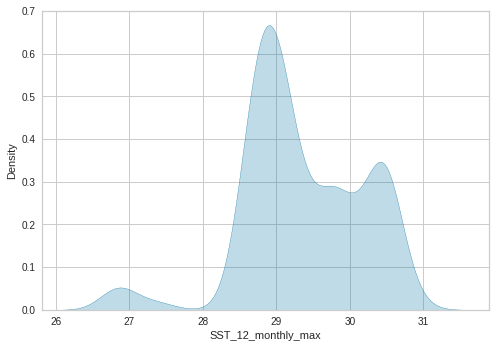

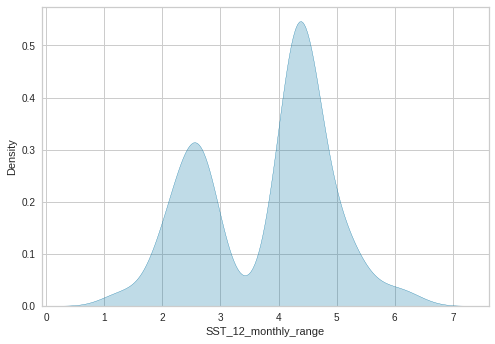

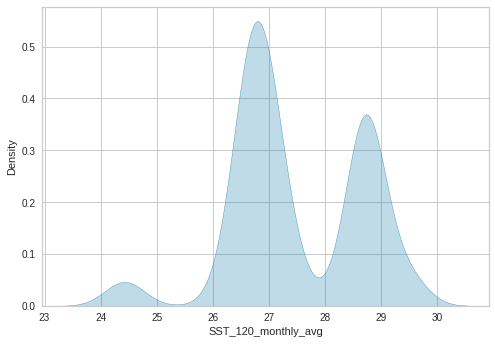

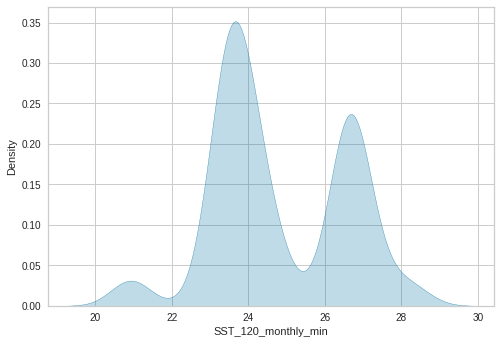

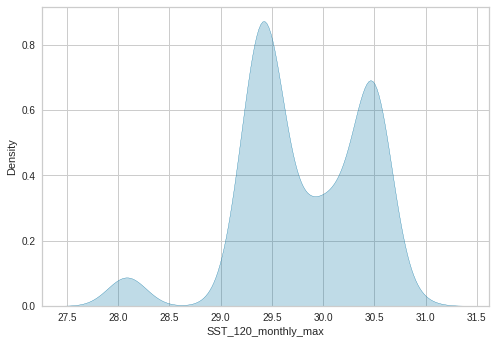

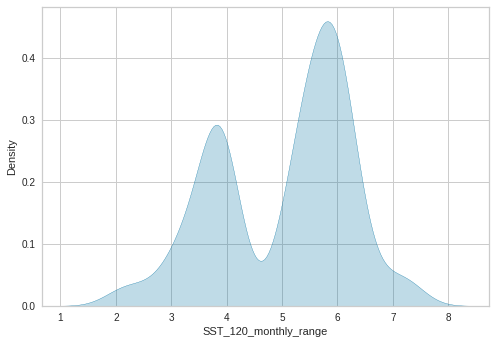

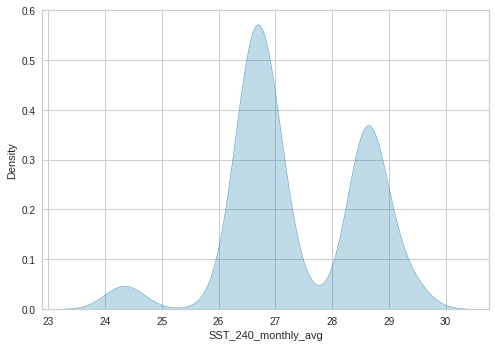

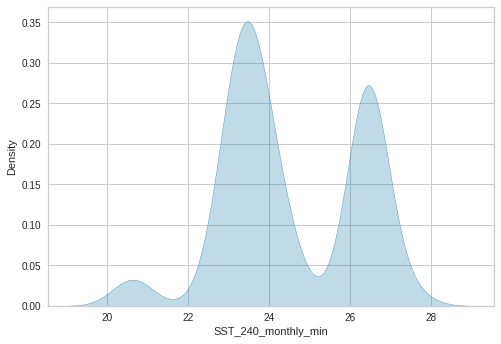

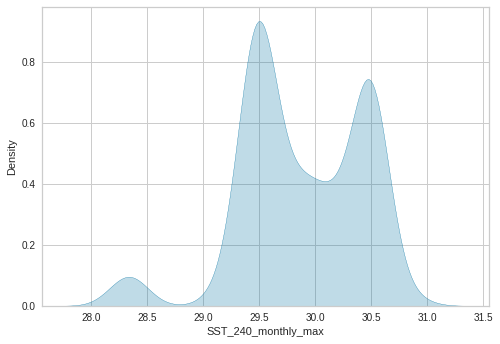

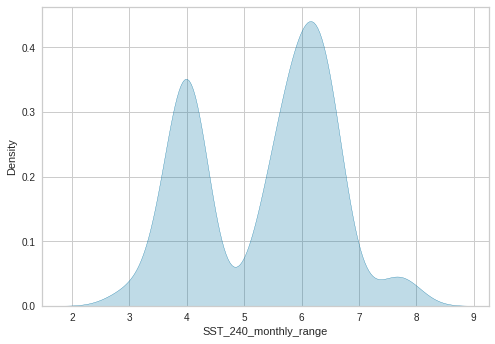

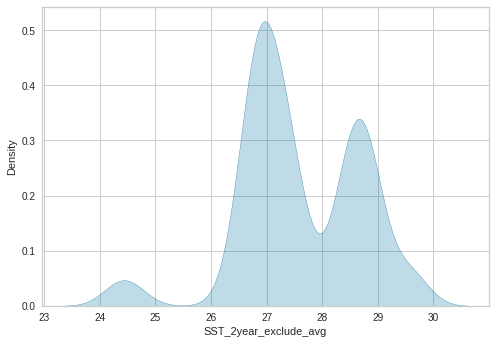

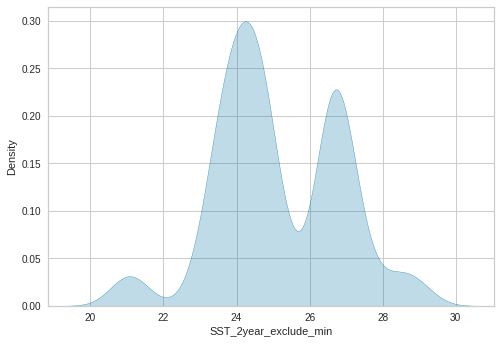

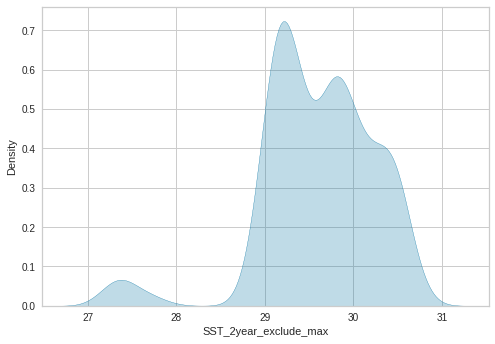

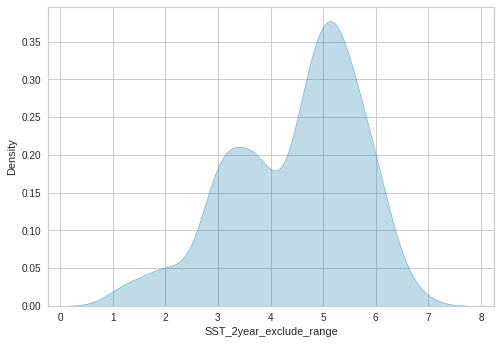

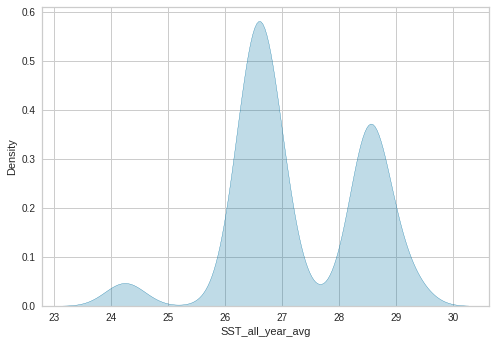

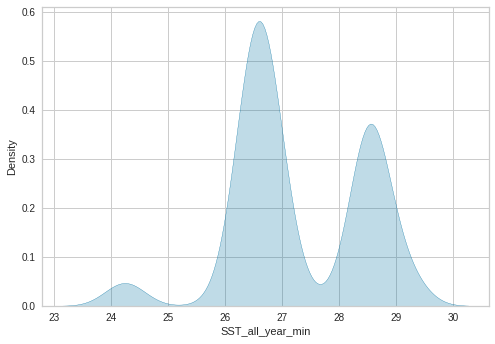

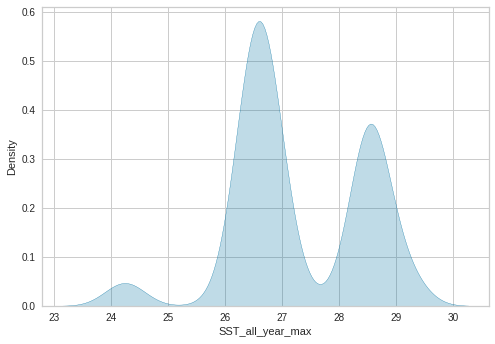

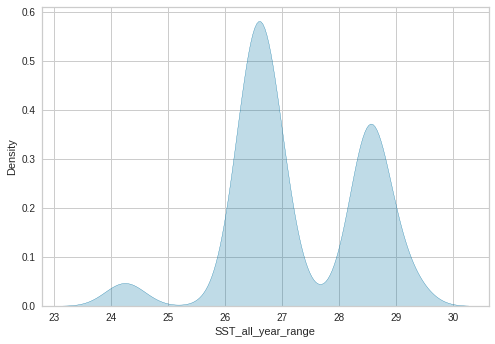

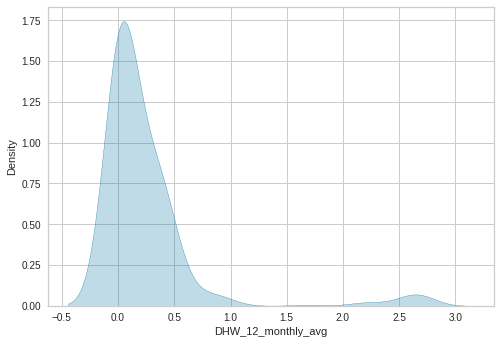

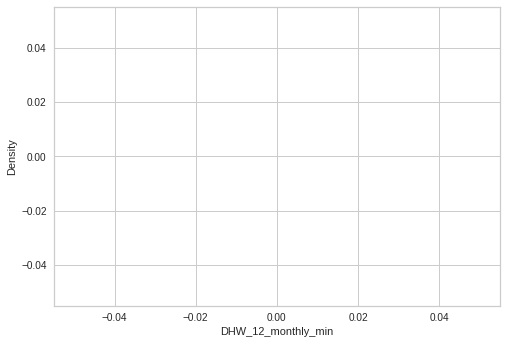

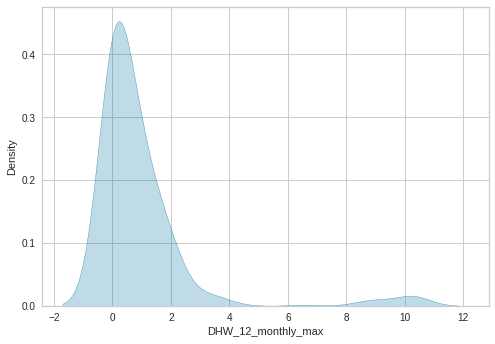

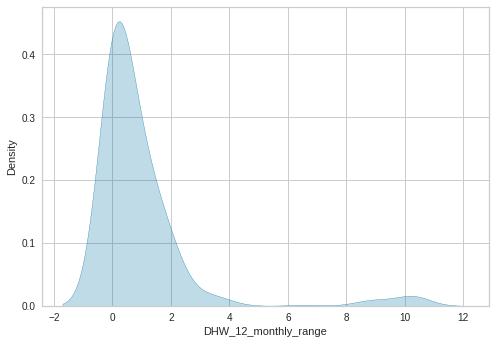

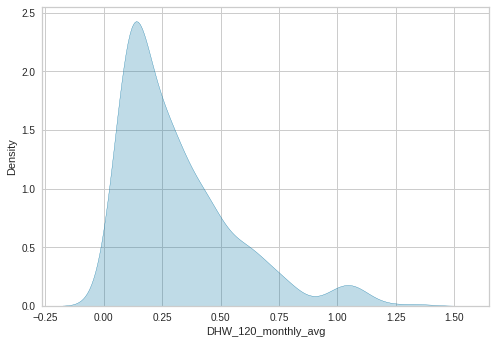

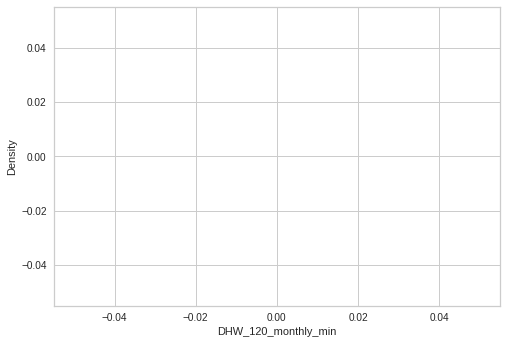

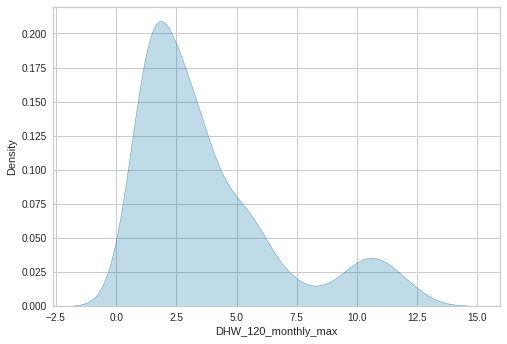

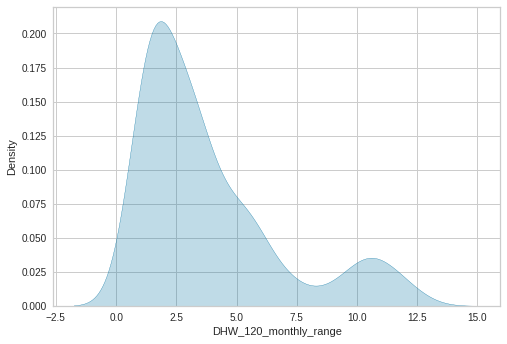

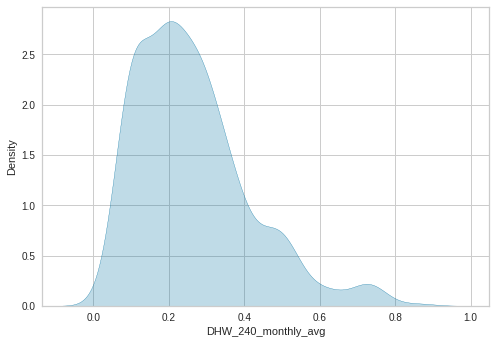

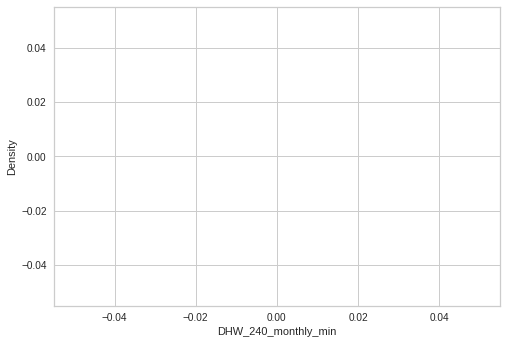

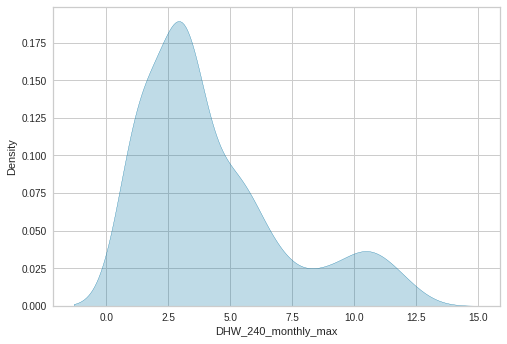

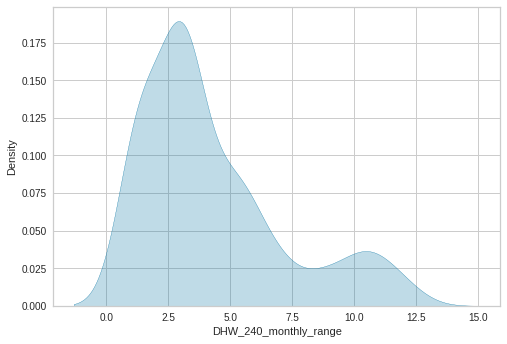

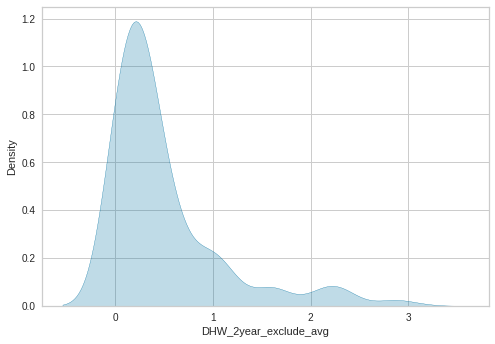

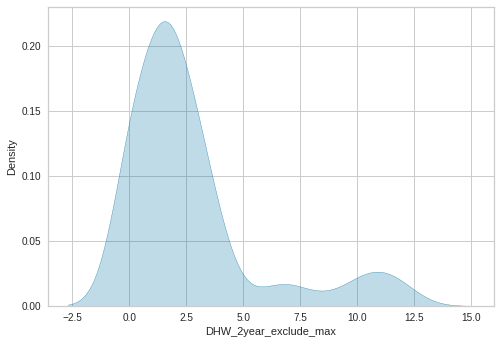

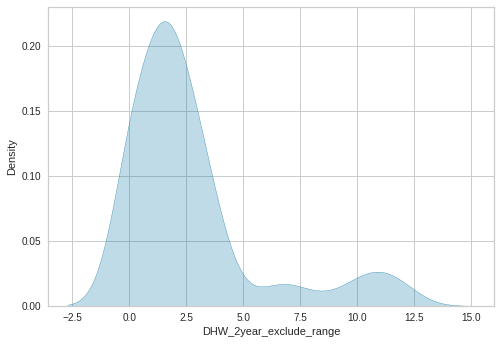

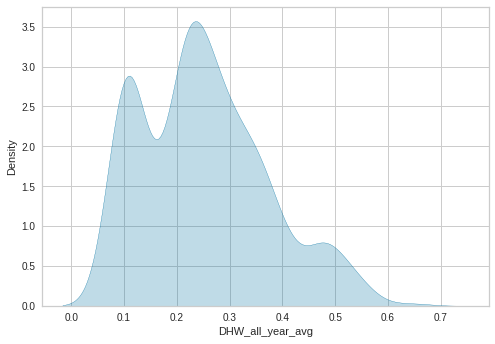

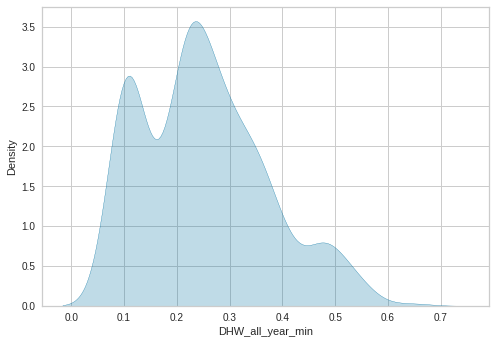

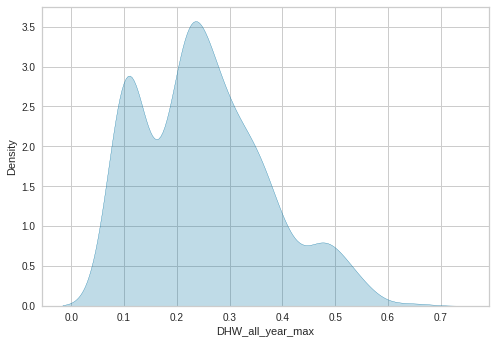

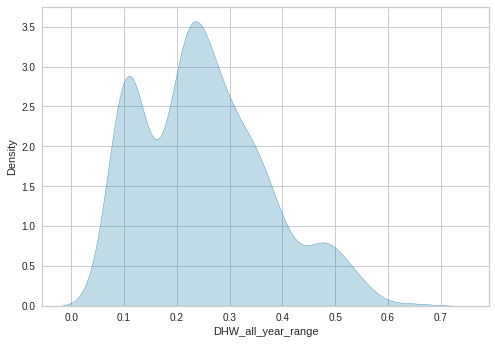

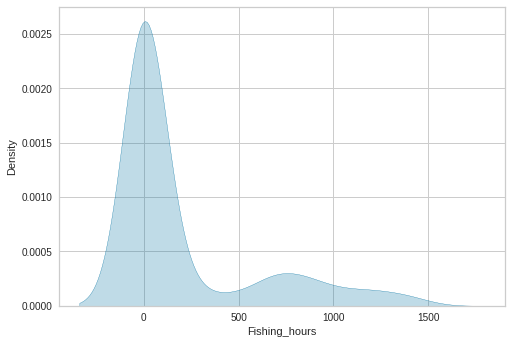

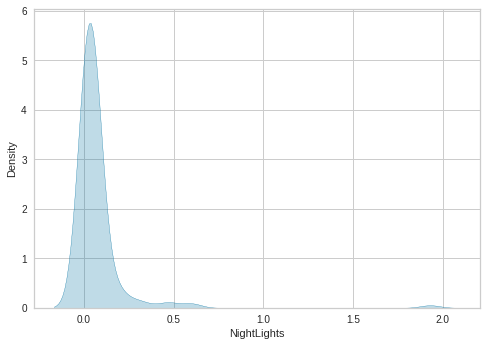

<Figure size 576x396 with 0 Axes>

In [8]:
for i, j in X.items():
    sns.kdeplot(j, shade = True)
    plt.figure()

In [9]:
X.describe()

,pr_algae,Chlor,elevation,par,closest_port,year,distance_urban,dist_marine_protection,distance_agr_land,wind_12_monthly_avg,...,DHW_240_monthly_range,DHW_2year_exclude_avg,DHW_2year_exclude_max,DHW_2year_exclude_range,DHW_all_year_avg,DHW_all_year_min,DHW_all_year_max,DHW_all_year_range,Fishing_hours,NightLights
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,4.160000e+02,416.000000,...,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,0.639331,0.440010,-28.653846,47.258668,401.539839,2014.367788,95089.552004,55787.185829,2.285040e+05,6.325475,...,4.255713,0.498397,2.691535,2.691535,0.251066,0.251066,0.251066,0.251066,199.371571,0.072752
std,0.128188,0.505566,74.281233,7.442807,154.543193,1.979855,65295.323434,54458.803572,3.187465e+05,2.098232,...,2.909539,0.597814,2.993379,2.993379,0.118519,0.118519,0.118519,0.118519,378.906998,0.185176
min,0.245500,0.055417,-820.000000,32.211998,14.224993,2012.000000,1957.900081,485.485645,4.268480e+04,1.777110,...,1.300000,0.000000,0.000000,0.000000,0.089855,0.089855,0.089855,0.089855,0.000000,0.000000
25%,0.550375,0.149483,-34.000000,41.583499,297.682508,2012.000000,42331.961058,20367.960556,9.054385e+04,4.861870,...,2.681429,0.179791,0.988333,0.988333,0.151882,0.151882,0.151882,0.151882,0.000000,0.003203
50%,0.647950,0.255607,-9.500000,45.347999,417.432869,2014.000000,72111.708063,36986.452699,1.391616e+05,7.212334,...,3.142500,0.291098,1.650000,1.650000,0.232769,0.232769,0.232769,0.232769,0.000000,0.042478
75%,0.732350,0.471203,-2.000000,54.748000,517.366122,2016.000000,148638.802908,61214.883014,2.209613e+05,7.996352,...,5.428929,0.599013,3.110000,3.110000,0.331096,0.331096,0.331096,0.331096,134.829200,0.066105
max,0.907000,4.310281,162.000000,61.114000,748.780649,2018.000000,246168.835815,234101.388622,1.664402e+06,8.862575,...,12.446000,3.075459,12.446000,12.446000,0.645722,0.645722,0.645722,0.645722,1461.022700,1.929311


In [10]:
# Standardize the Data
# I standardize all bu the hot one encoding ... 

In [11]:

data_scaler = StandardScaler().fit(X.values)
data_rescaled = data_scaler.transform(X.values)
X_scaled = pd.DataFrame(data_rescaled)
X_scaled.columns = X.columns
X_scaled = X_scaled.join(pd.get_dummies(df.country_code, prefix='Country'))


In [12]:
X_simple = X_scaled[["DHW_12_monthly_avg", "DHW_120_monthly_avg", "DHW_240_monthly_avg", "Country_0", "Country_1", "Country_2", "Country_3"]]

In [13]:
X_add = X_scaled[['Chlor', 'elevation', 'par', 'closest_port',
       'distance_urban', 'dist_marine_protection', 'distance_agr_land',
       'DHW_12_monthly_avg','DHW_120_monthly_avg','DHW_240_monthly_avg', 'Fishing_hours',
       'NightLights', 'Country_0', 'Country_1', 'Country_2', 'Country_3']]

## Careful when using K-fold because the data appears in a certain order, it must thus be shuffled

Might be better to use stratified K-fold in order to keep classes in both trian nad test

In [14]:

def K_cross_validation(x,y, model, logistic_model = False):
    # Create StratifiedKFold object.
    skf = RepeatedKFold(n_splits=12,  random_state=1, n_repeats=5)
    lst_accu_stratified = []

    for train_index, test_index in skf.split(x, y):
        
    
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        col_drop = x_train_fold.loc[:,x_train_fold.std() == 0].columns

        # Remove columns with zero standard deviation
        x_train_fold.drop(columns = col_drop, inplace = True)
        x_test_fold.drop(columns = col_drop, inplace = True)
        model.fit(x_train_fold, y_train_fold)
        if (logistic_model):
            y_pred = model.predict(x_test_fold)
            lst_accu_stratified.append(r2_score(y_test_fold, y_pred))
            
        else:
            lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
        


    
    print('\nMaximum that can be obtained from this model is:',
          max(lst_accu_stratified), 'R^2')
    print('\nMinimum :',
          min(lst_accu_stratified), 'R^2')
    print('\nOverall :',
          mean(lst_accu_stratified), 'R^2')
    print('\nStandard deviation is:', stdev(lst_accu_stratified), '\n')

## Linear regression 

In [15]:
i = 30 # after testing
model = linear_model.Ridge(alpha = i, normalize = False,fit_intercept=True)
print(" ------------- Linear model with regression for environmental data -------------\n")
K_cross_validation(X_simple, y_sqrt, model)


model = linear_model.Ridge(alpha = i,normalize = False,fit_intercept=True)
print(" ------------- Linear model with regression for anthropological data -------------\n")
K_cross_validation(X_add, y_sqrt, model)


 ------------- Linear model with regression for environmental data -------------


Maximum that can be obtained from this model is: 0.17440444466691352 R^2

Minimum : -0.23181211188400908 R^2

Overall : 0.025923602903637665 R^2

Standard deviation is: 0.08426189270462571 

 ------------- Linear model with regression for anthropological data -------------


Maximum that can be obtained from this model is: 0.39198531875316867 R^2

Minimum : -0.20128578342070824 R^2

Overall : 0.16378989303789668 R^2

Standard deviation is: 0.13869965469103582 



## Tree Regressor

Max_depth


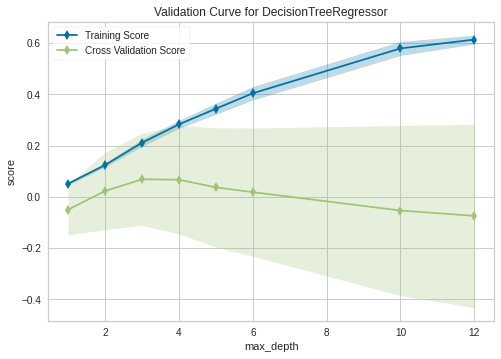

In [16]:
print("Max_depth")
cv = RepeatedKFold(n_splits=15, n_repeats=20)
param_range = [1,2,3, 4,5,6,10,12]

viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=param_range, cv=cv, scoring="r2", n_jobs=-1)

viz.fit(X_simple, y_sqrt)
viz.show()
plt.show()

Max_depth


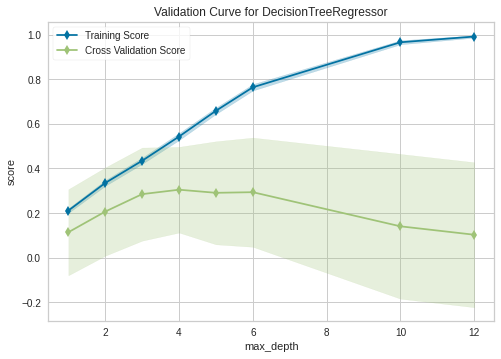

In [17]:
print("Max_depth")
cv = RepeatedKFold(n_splits=15, n_repeats=12)
param_range = [1,2,3, 4,5,6,10,12]

viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=param_range, cv=cv, scoring="r2", n_jobs=-1)

viz.fit(X_add, y_sqrt)
viz.show()
plt.show()

min_samples_split


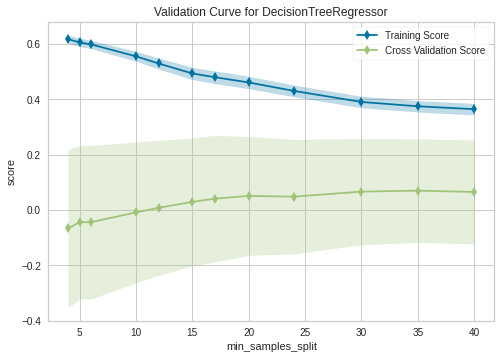

In [18]:
print("min_samples_split")
cv = RepeatedKFold(n_splits=12, n_repeats=15)
param_range = [4,5,6,10,12, 15, 17, 20, 24,30, 35, 40]

viz = ValidationCurve(DecisionTreeRegressor(), param_name="min_samples_split", param_range=param_range, cv=cv, scoring="r2", n_jobs=-1)

viz.fit(X_simple, y_sqrt)
viz.show()
plt.show()

min_samples_split


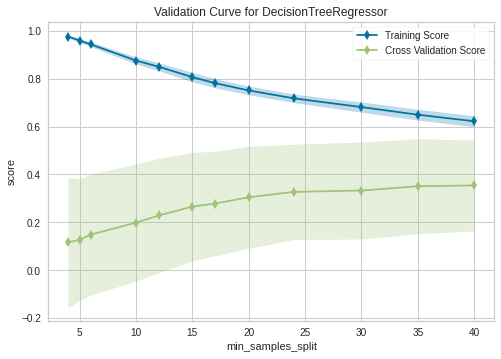

In [19]:
print("min_samples_split")
cv = RepeatedKFold(n_splits=12, n_repeats=15)
param_range = [4,5,6,10,12, 15, 17, 20, 24,30, 35, 40]

viz = ValidationCurve(DecisionTreeRegressor(), param_name="min_samples_split", param_range=param_range, cv=cv, scoring="r2", n_jobs=-1)

viz.fit(X_add, y_sqrt)
viz.show()
plt.show()

In [20]:


print("Environemtal MODEL")
model = DecisionTreeRegressor(criterion = "mse",max_depth=4, min_samples_split = 40)
K_cross_validation(X_simple, y_sqrt, model)

print("Anthropological MODEL")
model = DecisionTreeRegressor(criterion = "mse",max_depth=4, min_samples_split = 40)

K_cross_validation(X_add, y_sqrt, model)


Environemtal MODEL

Maximum that can be obtained from this model is: 0.3955420000638553 R^2

Minimum : -0.514982883338986 R^2

Overall : 0.09127062273010644 R^2

Standard deviation is: 0.1762818480282468 

Anthropological MODEL

Maximum that can be obtained from this model is: 0.645137749650179 R^2

Minimum : -0.17323273813775852 R^2

Overall : 0.33531651638487536 R^2

Standard deviation is: 0.14969024529903163 



## Logistic regression

In [21]:
class LogitRegression(LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)

In [22]:


print("Environemtal MODEL")
model = LogitRegression()

#print(" ------------- Linear model without regression for environmental data -------------\n")
K_cross_validation(X_simple, y_sqrt, model, logistic_model= True)

print("Anthropological MODEL")
model = LogitRegression()

#print(" ------------- Linear model without regression for environmental data -------------\n")
K_cross_validation(X_add, y_sqrt, model, logistic_model= True)





Environemtal MODEL

Maximum that can be obtained from this model is: 0.24406136999956285 R^2

Minimum : -0.2860114447512332 R^2

Overall : 0.02185480853107167 R^2

Standard deviation is: 0.1178057983737101 

Anthropological MODEL

Maximum that can be obtained from this model is: 0.4044712615267628 R^2

Minimum : -0.2825909893426404 R^2

Overall : 0.14854572793605048 R^2

Standard deviation is: 0.16879450409082186 



In [14]:
# Because balanced data set, no need to stratify
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_sqrt, test_size=0.20)
X_train, X_test, y_train, y_test = train_test_split(X_add, y_sqrt, test_size=0.20)

<AxesSubplot:xlabel='DHW_12_monthly_avg', ylabel='Density'>

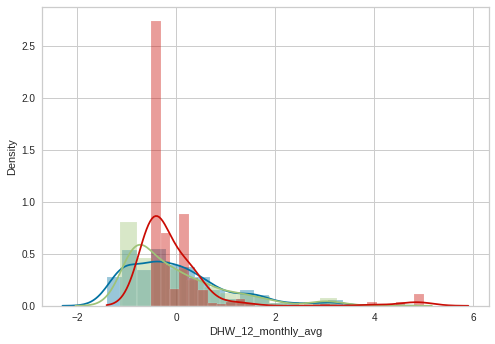

In [15]:
sns.distplot(X_simple["DHW_240_monthly_avg"])
sns.distplot(X_simple["DHW_120_monthly_avg"])
sns.distplot(X_simple["DHW_12_monthly_avg"])

In [16]:
col_drop_simple = X_train_simple.loc[:,X_train_simple.std() == 0].columns

col_drop_full = X_train.loc[:,X_train.std() == 0].columns
# Remove columns with zero standard deviation
X_train_simple.drop(columns = col_drop_simple, inplace = True)
X_train.drop(columns = col_drop_full, inplace = True)
X_test_simple.drop(columns = col_drop_simple, inplace = True)
X_test.drop(columns = col_drop_full, inplace = True)

### Linear Regression
Limitations:
- Not bounded !

Scored:
Return the coefficient R² of determination of the prediction. (best = 1)


Simple
R² Train without regularization =  0.0787406761317806
R² Test without regularization  =  0.07459765627567239
MAE score
MAE Train without reg=  0.0866008369535037
MAE Test without reg=  0.0852532781488505
R² Train with regularization  =  0.07867969355712567
R² Test with regularization  =  0.07366833421330299
MAE score
MAE Train with reg=  0.08667274343624143
MAE Test with reg=  0.08529007329495447


<AxesSubplot:>

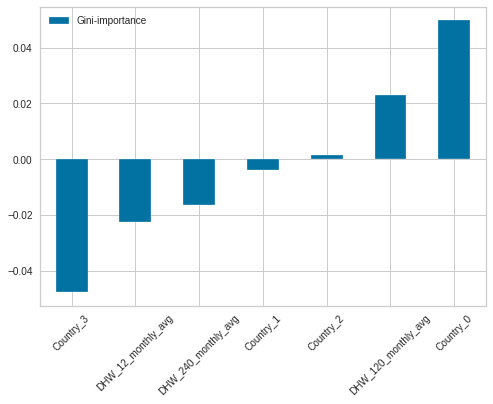

In [21]:
reg = LinearRegression(normalize = False,fit_intercept=True).fit(X_train_simple, y_train_simple)
y_train_simple_pred = reg.predict(X_train_simple)
y_test_simple_pred = reg.predict(X_test_simple)


print("Simple")
print("R² Train without regularization = ",reg.score(X_train_simple, y_train_simple))
print("R² Test without regularization  = ",reg.score(X_test_simple, y_test_simple))
print("MAE score")
print("MAE Train without reg= ", mean_absolute_error(y_train_simple, y_train_simple_pred))
print("MAE Test without reg= ", mean_absolute_error(y_test_simple, y_test_simple_pred))

# With Regu
reg = linear_model.Ridge(alpha=1,normalize = False,fit_intercept=True).fit(X_train_simple, y_train_simple)
y_train_simple_pred = reg.predict(X_train_simple)
y_test_simple_pred = reg.predict(X_test_simple)
print("R² Train with regularization  = ",reg.score(X_train_simple, y_train_simple))
print("R² Test with regularization  = ",reg.score(X_test_simple, y_test_simple))
print("MAE score")
print("MAE Train with reg= ", mean_absolute_error(y_train_simple, y_train_simple_pred))
print("MAE Test with reg= ", mean_absolute_error(y_test_simple, y_test_simple_pred))
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_simple.columns, reg.coef_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

Added data
R² Train without regularization =  0.21606793401638924
R² Test without regularization =  0.3413424593514919
MAE score
MAE Train without reg=  0.07980875836860515
MAE Test without reg=  0.07067731280270587
R² Train with regularization =  0.21417800745263493
R² Test with regularization =  0.3425028149590744
MAE score
MAE Train with reg =  0.0799215182925798
MAE Test with reg=  0.07080242631221709


<AxesSubplot:>

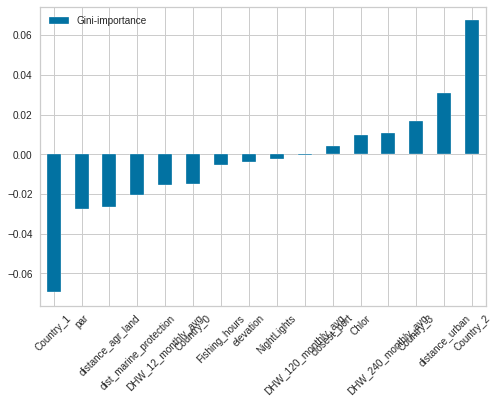

In [22]:
# With added data
reg = LinearRegression(normalize = False,fit_intercept=True).fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print("Added data")
print("R² Train without regularization = ",reg.score(X_train, y_train))
print("R² Test without regularization = ",reg.score(X_test, y_test))

print("MAE score")
print("MAE Train without reg= ", mean_absolute_error(y_train, y_train_pred))
print("MAE Test without reg= ", mean_absolute_error(y_test, y_test_pred))
# With Regu
reg = linear_model.Ridge(alpha=.8,normalize = False,fit_intercept=True).fit(X_train, y_train)
print("R² Train with regularization = ",reg.score(X_train, y_train))
print("R² Test with regularization = ",reg.score(X_test, y_test))
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("MAE score")
print("MAE Train with reg = ", mean_absolute_error(y_train, y_train_pred))
print("MAE Test with reg= ", mean_absolute_error(y_test, y_test_pred))
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, reg.coef_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)



## Decision Tree Regressor 

Criterion = MSE (wouldn't MAE be better ?)

Simple Model
 Training Model

R-Squared on train dataset=0.3580557624375259

Accuracy of Train Data with cross validation 
 : [-0.03048432 -0.50251789  0.29130489  0.36958677 -0.56283735  0.00935531
  0.19132075 -0.07064154  0.18364695 -0.30357589]

Test model

R-Squared on test dataset=0.06492291499189451

Accuracy of Test Data : [-0.55593157 -0.1427202  -0.11985161 -0.51340302 -0.556686   -6.10491192
 -0.08178141 -0.5049123  -0.20020534 -1.70533728]


<AxesSubplot:>

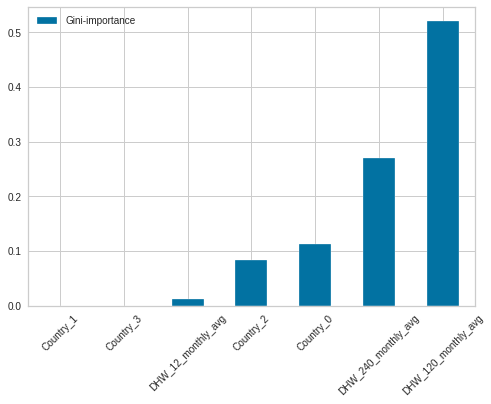

In [24]:
DTR = DecisionTreeRegressor(criterion = "mae",max_depth=5).fit(X_train_simple, y_train_simple)
print("Simple Model\n Training Model\n")
print("R-Squared on train dataset={}".format(DTR.score(X_train_simple,y_train_simple)))
print('\nAccuracy of Train Data with cross validation \n :', cross_val_score(DTR, X_train_simple,y_train_simple, cv=10 ))
print("\nTest model\n")
  
print("R-Squared on test dataset={}".format(DTR.score(X_test_simple,y_test_simple)))
print('\nAccuracy of Test Data :', cross_val_score(DTR, X_test_simple,y_test_simple, cv=10 ))
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_simple.columns, DTR.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)


Added data Model
 Training Model

R-Squared on train dataset=0.40754209659488105

Accuracy of Train Data with cross validation 
 : [0.4293366  0.06803533 0.3347507  0.01699241 0.3343297  0.29868847
 0.25077423 0.23369785 0.21291417 0.0445995 ]

Test model

R-Squared on test dataset=0.4891745146678729

Accuracy of Test Data : [ 0.33127501  0.13308479  0.37109157  0.04411805 -0.25932191 -0.34477277
 -0.50855546 -0.08626148 -0.45462173 -0.23131681]


<AxesSubplot:>

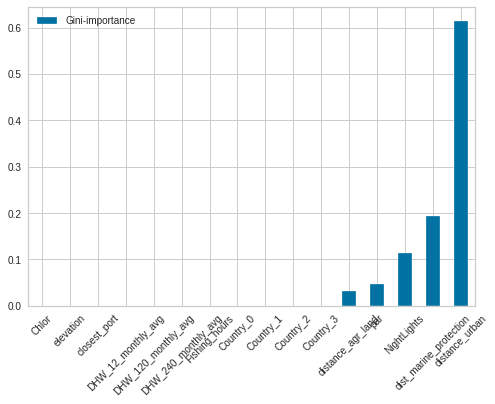

In [25]:
DTR = DecisionTreeRegressor(criterion = "mae",max_depth=3).fit(X_train, y_train)
print("Added data Model\n Training Model\n")
print("R-Squared on train dataset={}".format(DTR.score(X_train,y_train)))
print('\nAccuracy of Train Data with cross validation \n :', cross_val_score(DTR, X_train,y_train, cv=10 ))
print("\nTest model\n")

print("R-Squared on test dataset={}".format(DTR.score(X_test,y_test)))
print('\nAccuracy of Test Data :', cross_val_score(DTR, X_test,y_test, cv=10 ))

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, DTR.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

## Logistic workaround ?
- Limitations

Need for adding regularization ? 

In [23]:

class LogitRegression(LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)



In [24]:

model = LogitRegression()
model.fit(X_train_simple, y_train_simple)

y_train_pred_simple = model.predict(X_train_simple)
y_test_pred_simple = model.predict(X_test_simple)

print("Simple model R² score\n")
print("Train = ", r2_score(y_train_simple, y_train_pred_simple))
print("Test = ", r2_score(y_test_simple, y_test_pred_simple))

print("\nSimple model MAE score\n")
print("Train = ", mean_absolute_error(y_train_simple, y_train_pred_simple))
print("Test = ", mean_absolute_error(y_test_simple, y_test_pred_simple))




Simple model R² score

Train =  0.106428673368542
Test =  -0.09396804195058195

Simple model MAE score

Train =  0.08720927327418512
Test =  0.08144286643917398


In [25]:
model = LogitRegression()
model.fit(X_train, y_train)

y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Added model R² score\n")
print("Train = ", r2_score(y_train, y_train_pred))
print("Test = ", r2_score(y_test, y_test_pred))
print("\nAdded model MAE score\n")
print("Train = ", mean_absolute_error(y_train, y_train_pred))
print("Test = ", mean_absolute_error(y_test, y_test_pred))

Added model R² score

Train =  0.24550254209514788
Test =  0.02513576687770047

Added model MAE score

Train =  0.07751217962017726
Test =  0.08461087020969618
